In [2]:
from aart_func import *
from params import * 
from tools import *
from astropy import units as u
from astropy import constants as const
%load_ext autoreload
%autoreload 2
import importlib 


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca



In [14]:
r_array = np.logspace(np.log10(2), np.log10(50)) * u.dimensionless_unscaled
r_array[0].unit

Unit(dimensionless)

In [129]:
def j_coeff_func(r, redshift, nu0=ilp.kw_nu0,mass=ilp.kw_mass, theta_b=ilp.kw_theta_b, 
            beta=ilp.kw_beta,rb_0=ilp.kw_rb_0,n_th0=ilp.kw_n_th0,t_e0=ilp.kw_t_e0,p_dens=ilp.kw_p_dens,p_temp=ilp.kw_p_temp):
    n = ilp.nth_func(r,mass,rb_0,n_th0,p_dens)
    theta_e = ilp.theta_e_func(r,mass,rb_0,t_e0,p_temp)
    nu_c = ilp.nu_c_func(r,mass,theta_b,rb_0,t_e0,p_temp)
    nu = nu0/redshift
    x = nu / (nu_c)
    # Returns units of [u.erg / (u.cm ** 3 * u.s * u.Hz)]
    return n * ilp.e ** 2 * nu * ilp.synchrotron_func(x) / (2 * np.sqrt(3) * ilp.c * theta_e ** 2)

<Figure size 640x480 with 0 Axes>

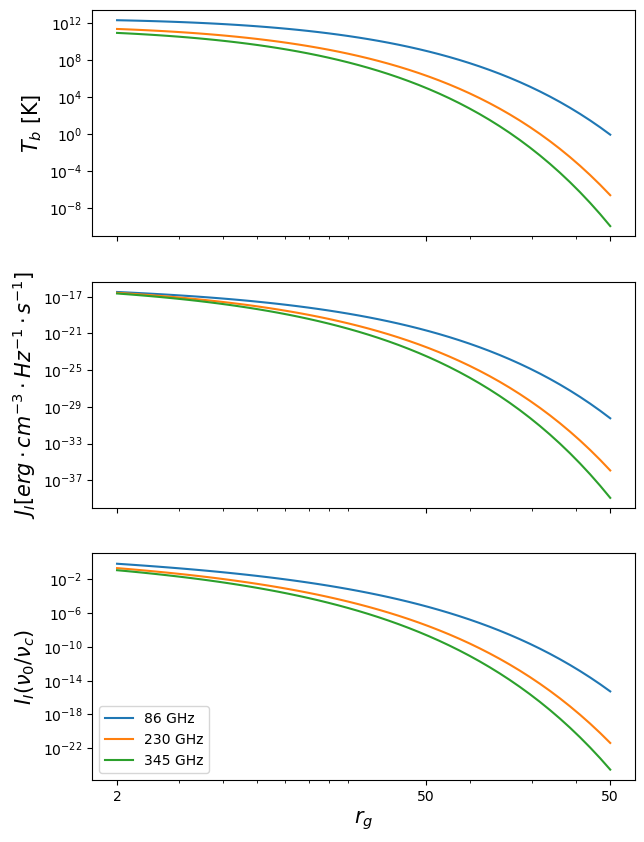

In [158]:
ilp.set_b_params()
plt.figure(1)
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex='col', figsize=(7,10))


# subplot 1--------------------------------------------------------------------------------------------------
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot(r_array,ilp.profile(r_array, 1), label = "86 GHz")
ax1.plot(r_array,ilp.profile(r_array, 1, nu0=230e9 * ilp.Hz), label = "230 GHz")
ax1.plot(r_array,ilp.profile(r_array, 1, nu0=345e9 * ilp.Hz), label = "345 GHz")
ax1.set_ylabel(R'$T_b$ [K]',fontsize=15)


# subplot 2--------------------------------------------------------------------------------------------------
ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.plot(r_array,j_coeff_func(r_array, 1), label = "86 GHz")
ax2.plot(r_array,j_coeff_func(r_array, 1, nu0=230e9 * ilp.Hz), label = "230 GHz")
ax2.plot(r_array,j_coeff_func(r_array, 1, nu0=345e9 * ilp.Hz), label = "345 GHz")

ax2.set_ylabel(R'$J_I [erg \cdot  cm^{-3} \cdot Hz^{-1} \cdot s^{-1}]$',fontsize=15)
#ax2.set_ylabel(R'$J_I [\frac{erg}{cm^{3} \cdot Hz \cdot s}]$',fontsize=15)

# subplot 2--------------------------------------------------------------------------------------------------
ax3.plot(r_array,ilp.synchrotron_func(86e9 * u.Hz / ilp.nu_c_func(r_array)), label = "86 GHz")
ax3.plot(r_array,ilp.synchrotron_func(230e9 * u.Hz / ilp.nu_c_func(r_array)), label = "230 GHz")
ax3.plot(r_array,ilp.synchrotron_func(345e9 * u.Hz / ilp.nu_c_func(r_array)), label = "345 GHz")

ax3.legend(loc='lower left')
ax3.set_yscale('log')
ax3.set_xticks([2, 15, 50], labels=['2', '50', '50'])
ax3.set_xlabel(R'$r_g$',fontsize=15)
ax3.set_ylabel(R'$I_I(\nu_0 / \nu_c)$',fontsize=15)

plt.savefig("Figure_1")


In [9]:
"{:.1e}".format(2e4)

'2.0e+04'

In [18]:
# Value Tests
ilp.set_b_params()
r = 2
print(ilp.rg_func(ilp.kw_mass))
print(ilp.rb_func(ilp.kw_mass))
print(ilp.te_func(r))
print(ilp.theta_e_func(r))
print(ilp.nth_func(r))
print(ilp.b_func(r))
print(ilp.nu_c_func(r))
print(ilp.synchrotron_func(ilp.kw_nu0/ilp.nu_c_func(r)))
print(ilp.profile(r,1))

147706327752770.22 cm
8862379665166214.0 cm
141015506890.0428 K
23.780432778011576
133011.7445941008 1 / cm3
20.464158793405165 g(1/2) / (cm(1/2) s)
42082043957.86257 Hz
0.7301688315148334
2132816130475.397 K


In [24]:
const.e.esu

<<class 'astropy.constants.codata2018.EMCODATA2018'> name='Electron charge' value=4.803204712570263e-10 uncertainty=0.0 unit='Fr' reference='CODATA 2018'>

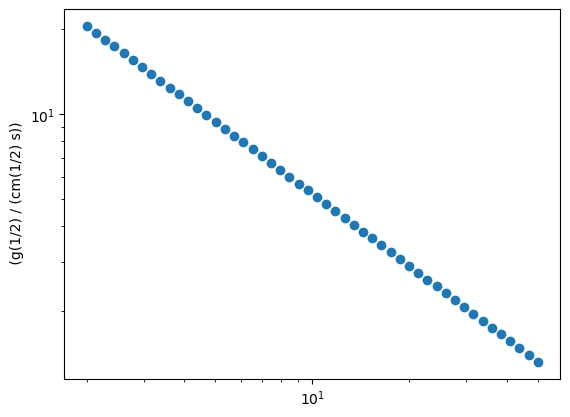

In [20]:
# Line of Best Fit
scatter_with_units(r_array,ilp.full_b_func(r_array))
plt.xscale('log')
plt.yscale('log')


In [31]:
a = [1* u.g,2* u.g,3* u.g]
ilp.full_b_func(r_array).value


array([20.46415879, 19.35280485, 18.30180558, 17.30788328, 16.36793826,
       15.47903914, 14.63841377, 13.84344052, 13.09164014, 12.38066805,
       11.70830695, 11.07246   , 10.4711442 ,  9.90248425,  9.36470672,
        8.85613445,  8.37518138,  7.92034759,  7.49021462,  7.08344102,
        6.69875821,  6.3349665 ,  5.99093135,  5.66557983,  5.35789728,
        5.06692415,  4.791753  ,  4.53152567,  4.28543058,  4.05270026,
        3.83260891,  3.62447013,  3.42763481,  3.2414891 ,  3.06545246,
        2.89897591,  2.74154025,  2.5926545 ,  2.45185434,  2.31870067,
        2.19277821,  2.07369427,  1.96107746,  1.85457657,  1.75385946,
        1.65861202,  1.56853722,  1.48335414,  1.40279713,  1.32661496])

In [42]:
A1, A2 = ilp.b_best_fit()
print(A1, A2)

11.361634932293804 -0.8500000000000013


In [3]:

print(ilp.b_0)

1.136163493229122


In [4]:
print(ilp.b_0)

1.136163493229122


In [8]:
print("Hello \n test")

Hello 
 test


In [33]:
(np.ndarray([2,2]) * 2).mean()

8.0